In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor as sklearn_GBR
import numpy as np
import Boosting

# 1. Generate Synthetic Data
X, y = make_regression(n_samples=500, n_features=10, n_informative=5, noise=15, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
#print(X_train.shape)
#print(y_train.shape)
#print(y_test.shape)
#print(X_test.shape)

Huber - Custom MSE: 483.2903 | Sklearn MSE: 912.0997


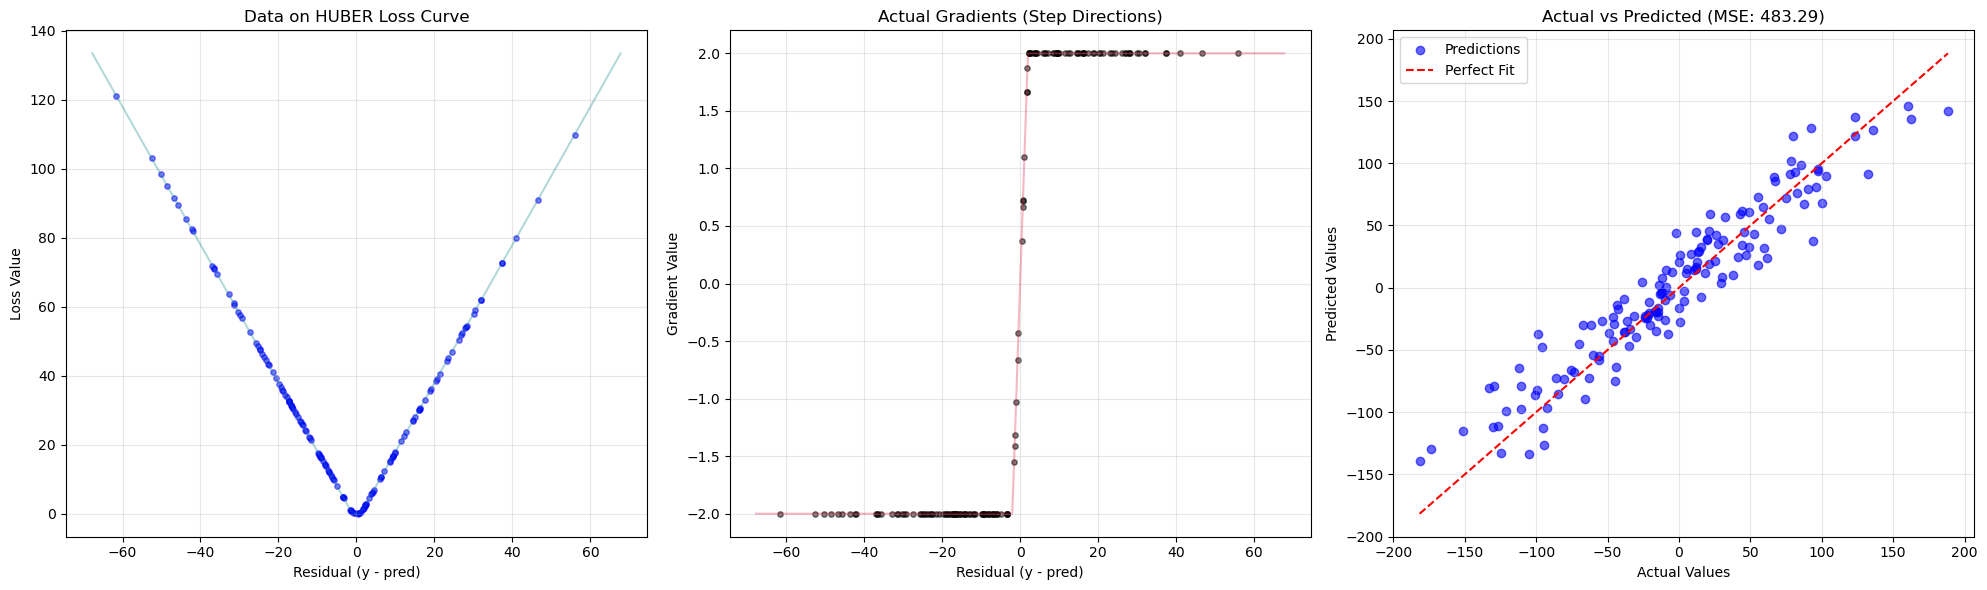

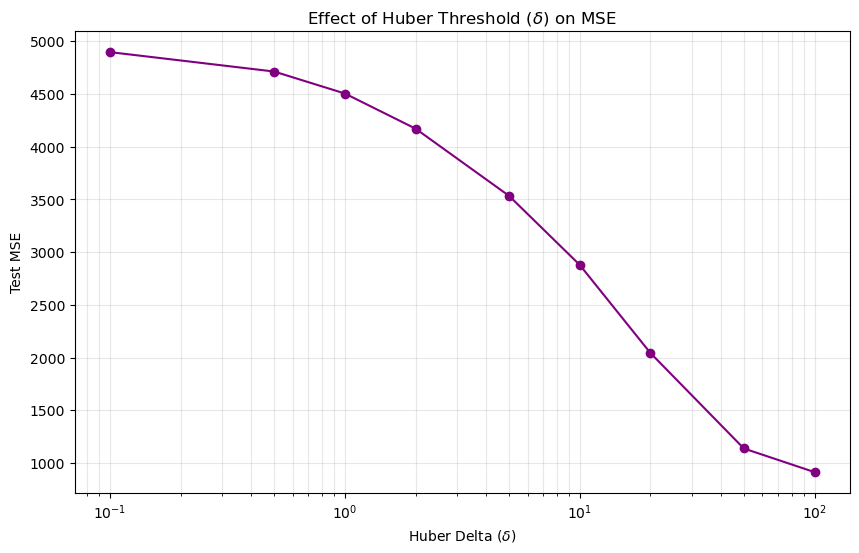

In [ ]:
#####HUBER#######
import numpy as np
import matplotlib.pyplot as plt
from Boosting import GBRegressor, LossType 
import Boosting


model_hub = Boosting.GBRegressor(n_estimators=100, learning_rate=5.0, max_depth=1, loss_type=Boosting.LossType.HUBER, delta=2)
model_hub.fit(X_train, y_train)
##AI
mse_c_hub = mean_squared_error(y_test, model_hub.predict(X_test))

#SklearnHuber ##USED AI for sklearn
model_s_hub = sklearn_GBR(n_estimators=100, learning_rate=0.1, max_depth=1, loss='huber')
model_s_hub.fit(X_train, y_train)
mse_s_hub = mean_squared_error(y_test, model_s_hub.predict(X_test))
###

print(f"Huber - Custom MSE: {mse_c_hub:.4f} | Sklearn MSE: {mse_s_hub:.4f}")

y_pred = model_hub.predict(X_test)

model_hub.plot_loss_analysis(y_test, y_pred)



###FOR 5.5 Plotting delta###
deltas = [0.1, 0.5, 1.0, 2.0, 5.0, 10.0, 20.0, 50.0, 100.0]
delta_mse_results = []

for d in deltas:
    model = Boosting.GBRegressor(
        n_estimators=100, 
        learning_rate=0.1, 
        max_depth=1, 
        loss_type=Boosting.LossType.HUBER, 
        delta=d
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = np.mean((y_test - y_pred)**2)
    delta_mse_results.append(mse)

plt.figure(figsize=(10, 6))
plt.plot(deltas, delta_mse_results, marker='o', linestyle='-', color='purple')
plt.xscale('log')  
plt.title("Effect of Huber Threshold ($\delta$) on MSE")
plt.xlabel("Huber Delta ($\delta$)")
plt.ylabel("Test MSE")
plt.grid(True, which="both", ls="-", alpha=0.3)
plt.show()


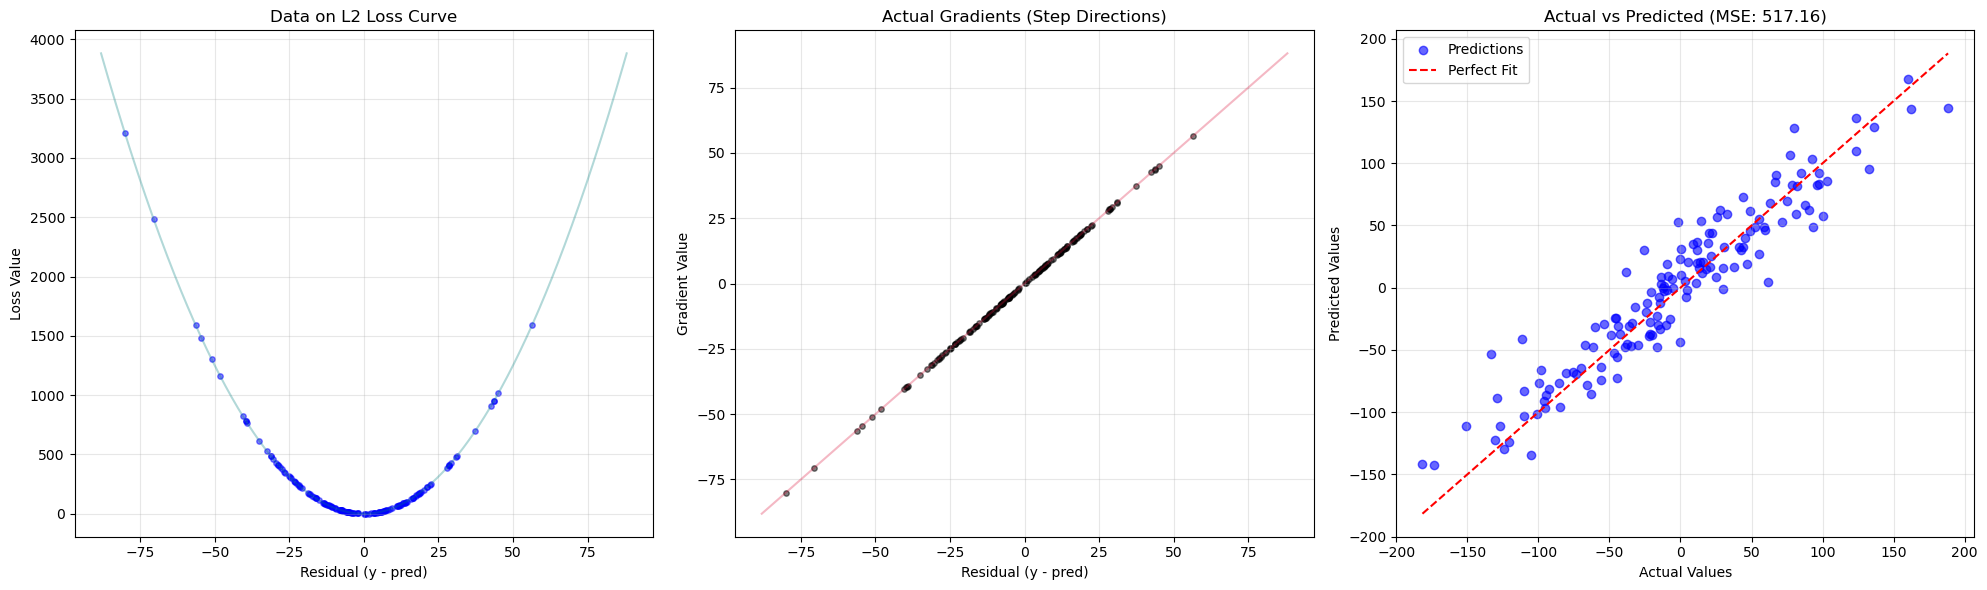

Custom Model MSE: 517.1551
Sklearn Model MSE: 907.6213
Difference: 390.4663


In [ ]:
###L2###
import numpy as np
import matplotlib.pyplot as plt
from Boosting import GBRegressor, LossType 
import Boosting


model = Boosting.GBRegressor(n_estimators=100, learning_rate=0.5, max_depth=1, loss_type=Boosting.LossType.L2)
model.fit(X_train, y_train)
#AI
mse_custom = mean_squared_error(y_test, model.predict(X_test))

y_pred = model.predict(X_test)

model.plot_loss_analysis(y_test, y_pred)

##AI for MSE
model_sklearn = sklearn_GBR(n_estimators=100, learning_rate=0.1, max_depth=1, loss='squared_error')
model_sklearn.fit(X_train, y_train)
mse_sklearn = mean_squared_error(y_test, model_sklearn.predict(X_test))

print(f"Custom Model MSE: {mse_custom:.4f}")
print(f"Sklearn Model MSE: {mse_sklearn:.4f}")
print(f"Difference: {abs(mse_custom - mse_sklearn):.4f}")

L1 - Custom MSE: 507.7295 | Sklearn MSE: 1092.8679


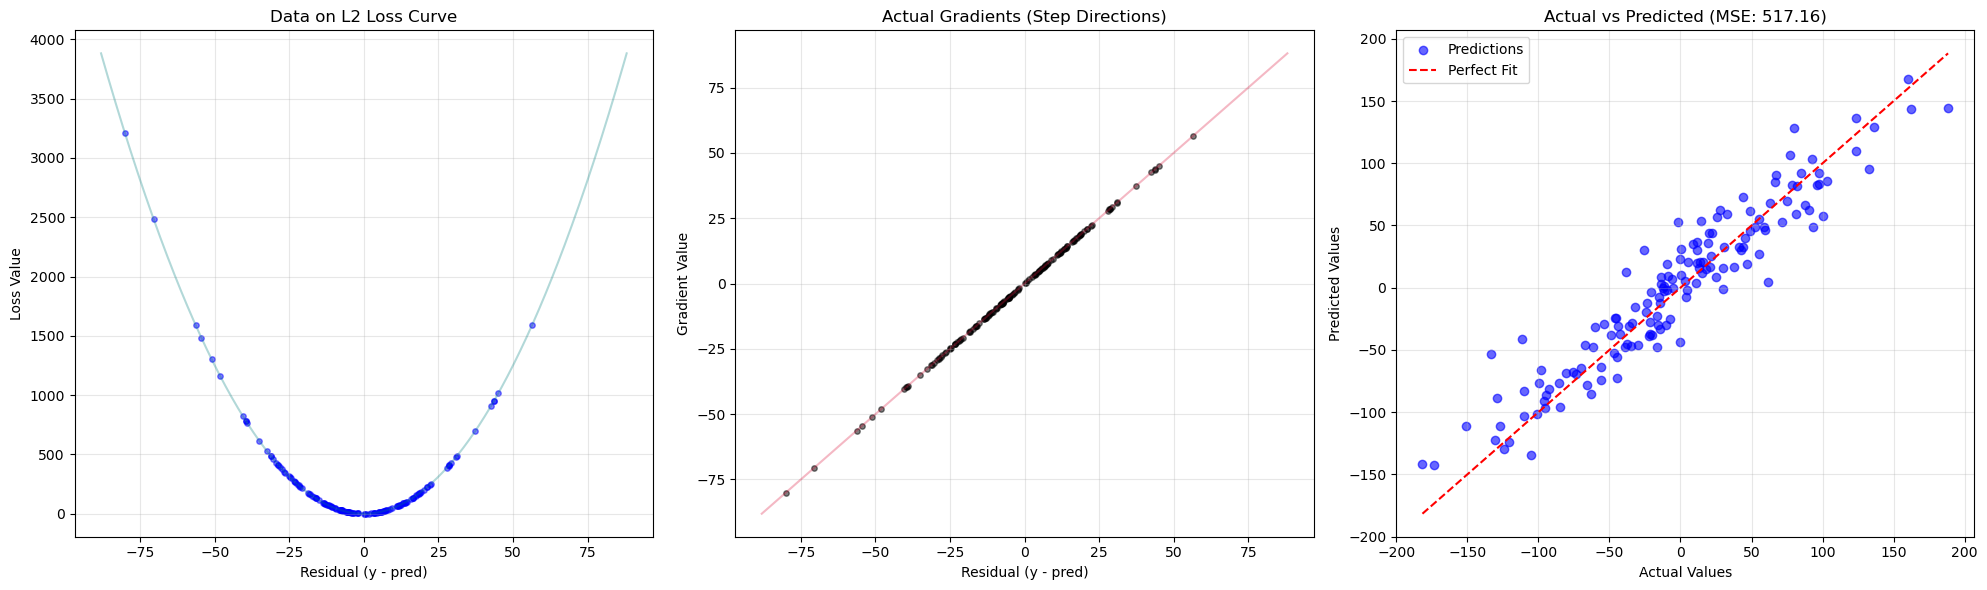

In [4]:
###L2###
import numpy as np
import matplotlib.pyplot as plt
from Boosting import GBRegressor, LossType 
import Boosting


model_l1 = Boosting.GBRegressor(n_estimators=100, learning_rate=7.0, max_depth=1, loss_type=Boosting.LossType.L1)
model_l1.fit(X_train, y_train)
mse_c_l1 = mean_squared_error(y_test, model_l1.predict(X_test))

# Sklearn L1
model_s_l1 = sklearn_GBR(n_estimators=100, learning_rate=0.1, max_depth=1, loss='absolute_error')
model_s_l1.fit(X_train, y_train)
mse_s_l1 = mean_squared_error(y_test, model_s_l1.predict(X_test))

print(f"L1 - Custom MSE: {mse_c_l1:.4f} | Sklearn MSE: {mse_s_l1:.4f}")

y_pred = model.predict(X_test)

model.plot_loss_analysis(y_test, y_pred)

Depth 1 (Stump) MSE: 907.62
Depth 5 (Deep Tree) MSE: 825.25


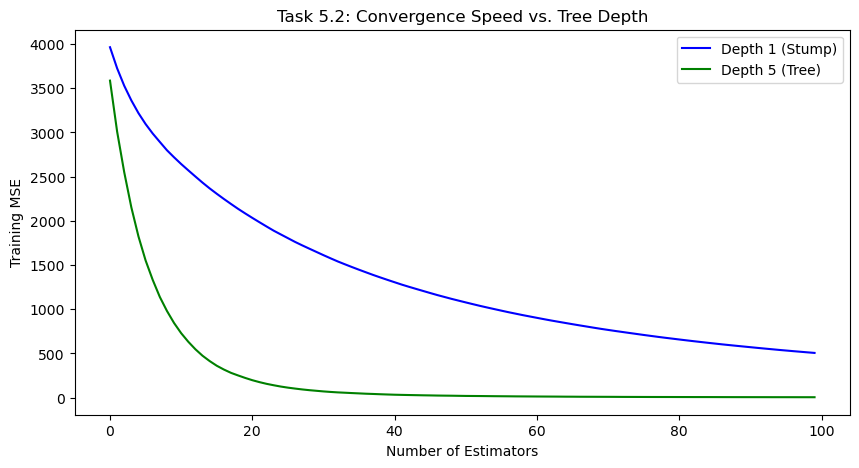

In [5]:
### FOR TASK 5.2
model_depth_1 = Boosting.GBRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, loss_type=Boosting.LossType.L2)
model_depth_1.fit(X_train, y_train)
mse_d1 = mean_squared_error(y_test, model_depth_1.predict(X_test))

model_depth_5 = Boosting.GBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, loss_type=Boosting.LossType.L2)
model_depth_5.fit(X_train, y_train)
mse_d5 = mean_squared_error(y_test, model_depth_5.predict(X_test))

print(f"Depth 1 (Stump) MSE: {mse_d1:.2f}")
print(f"Depth 5 (Deep Tree) MSE: {mse_d5:.2f}")

# Plotting the comparison
plt.figure(figsize=(10, 5))
plt.plot(model_depth_1.history_, label='Depth 1 (Stump)', color='blue')
plt.plot(model_depth_5.history_, label='Depth 5 (Tree)', color='green')
plt.title("Task 5.2: Convergence Speed vs. Tree Depth")
plt.xlabel("Number of Estimators")
plt.ylabel("Training MSE")
plt.legend()
plt.show()

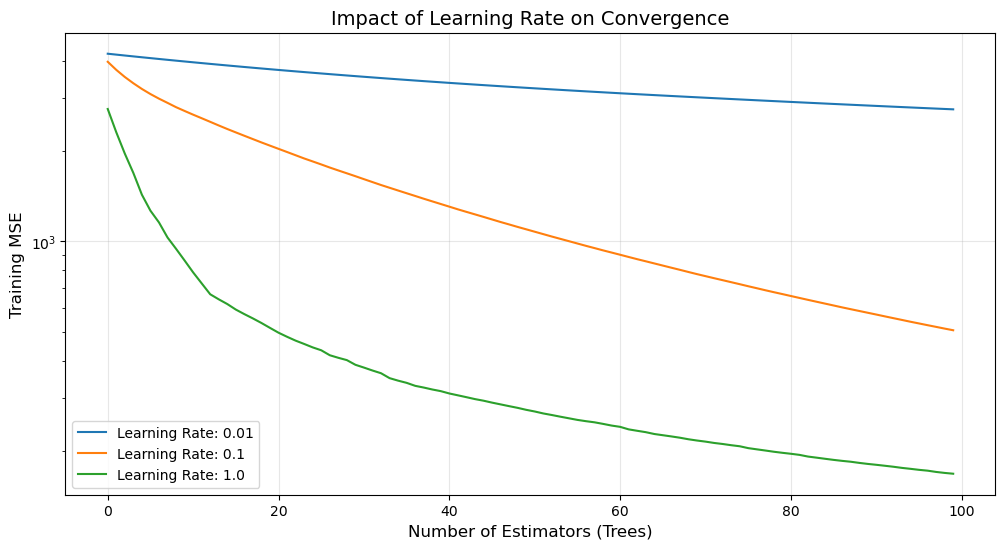

In [6]:
####5.3
# 0.01 slow, 0.1 normal, 1.0 fast but not super aggressive 
learning_rates = [0.01, 0.1, 1.0]
plt.figure(figsize=(12, 6))

for lr in learning_rates:
    model = Boosting.GBRegressor(n_estimators=100, learning_rate=lr, max_depth=1, loss_type=Boosting.LossType.L2)
    model.fit(X_train, y_train)
    
    plt.plot(range(len(model.history_)), model.history_, label=f'Learning Rate: {lr}')

plt.title("Impact of Learning Rate on Convergence", fontsize=14)
plt.xlabel("Number of Estimators (Trees)", fontsize=12)
plt.ylabel("Training MSE", fontsize=12)
plt.yscale('log') # Log scale helps visualize the early stages of learning
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

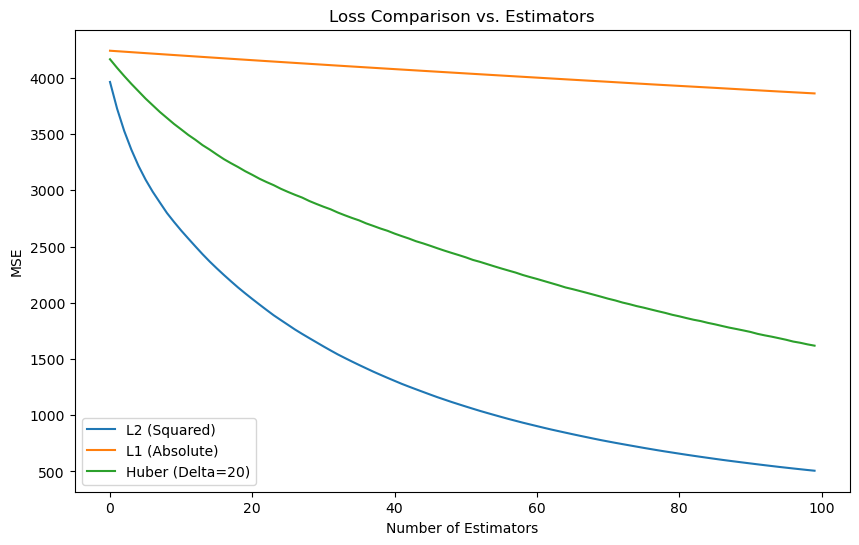

In [7]:
plt.figure(figsize=(10, 6))

m_l2 = Boosting.GBRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, loss_type=Boosting.LossType.L2).fit(X_train, y_train)
plt.plot(m_l2.history_, label='L2 (Squared)')

m_l1 = Boosting.GBRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, loss_type=Boosting.LossType.L1).fit(X_train, y_train)
plt.plot(m_l1.history_, label='L1 (Absolute)')

m_hub = Boosting.GBRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, loss_type=Boosting.LossType.HUBER, delta=20.0).fit(X_train, y_train)
plt.plot(m_hub.history_, label='Huber (Delta=20)')

plt.title("Loss Comparison vs. Estimators")
plt.xlabel("Number of Estimators")
plt.ylabel("MSE")
plt.legend()
plt.show()